In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# EDA

In [2]:
df = pd.read_csv('depression_dataset_reddit_cleaned.csv')
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [3]:
df.shape

(7731, 2)

In [4]:
df['is_depression'].value_counts()

0    3900
1    3831
Name: is_depression, dtype: int64

<AxesSubplot:xlabel='is_depression', ylabel='count'>

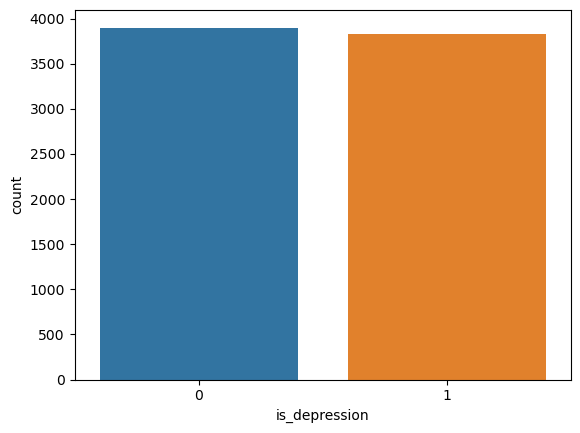

In [5]:
sns.countplot(x=df['is_depression'])

In [6]:
df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

# Text Preprocessing:

In [7]:
import spacy 
nlp = spacy.load("en_core_web_lg")

In [8]:
def preprocess(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_text.append(token.lemma_.lower())
        
    return " ".join(filtered_text)
    

In [9]:
df['preprocessed_text'] = df['clean_text'].apply(preprocess)


In [10]:
df.head(10)

,clean_text,is_depression,preprocessed_text
0,we understand that most people who reply immed...,1,understand people reply immediately op invitat...
1,welcome to r depression s check in post a plac...,1,welcome r depression s check post place moment...
2,anyone else instead of sleeping more when depr...,1,instead sleep depressed stay night avoid day c...
3,i ve kind of stuffed around a lot in my life d...,1,ve kind stuff lot life delay inevitable have w...
4,sleep is my greatest and most comforting escap...,1,sleep great comforting escape wake day literal...
5,i m year old turning soon in a few month i liv...,1,m year old turning soon month live constant dr...
6,i live alone and despite me being prone to lon...,1,live despite prone loneliness find emotionally...
7,i m not looking for sympathy just simply to st...,1,m look sympathy simply state m try survive m s...
8,i don t know how to communicate all of my thou...,1,don t know communicate thought stay inside ins...
9,mom i m sad it hurt in my heart the feeling fa...,1,mom m sad hurt heart feeling fall stomach t st...


In [11]:
df['text_vector'] = df['preprocessed_text'].apply(lambda text:nlp(text).vector)

In [12]:
df.head(10)

,clean_text,is_depression,preprocessed_text,text_vector
0,we understand that most people who reply immed...,1,understand people reply immediately op invitat...,"[0.8455282, 0.45013258, -1.9158481, -0.0487481..."
1,welcome to r depression s check in post a plac...,1,welcome r depression s check post place moment...,"[0.6967796, 0.7215889, -0.9899501, -0.25296408..."
2,anyone else instead of sleeping more when depr...,1,instead sleep depressed stay night avoid day c...,"[0.46284378, 1.9265901, -3.2654982, -0.0917125..."
3,i ve kind of stuffed around a lot in my life d...,1,ve kind stuff lot life delay inevitable have w...,"[0.42217827, 0.7715917, -3.5295572, -1.382153,..."
4,sleep is my greatest and most comforting escap...,1,sleep great comforting escape wake day literal...,"[0.36141968, 1.4885333, -2.4432557, -1.5032272..."
5,i m year old turning soon in a few month i liv...,1,m year old turning soon month live constant dr...,"[0.61101425, 1.4473869, -3.691894, -2.0742376,..."
6,i live alone and despite me being prone to lon...,1,live despite prone loneliness find emotionally...,"[0.26670077, 1.2176007, -2.9347131, -0.9656231..."
7,i m not looking for sympathy just simply to st...,1,m look sympathy simply state m try survive m s...,"[0.64508307, 1.3247648, -3.4841676, -2.0204396..."
8,i don t know how to communicate all of my thou...,1,don t know communicate thought stay inside ins...,"[0.57261205, 1.7514446, -3.0676894, -0.9321338..."
9,mom i m sad it hurt in my heart the feeling fa...,1,mom m sad hurt heart feeling fall stomach t st...,"[0.71175456, 2.6162949, -4.2620287, -1.7215234..."


In [13]:
df = df.sample(frac=1)

In [14]:
df.head(10)

,clean_text,is_depression,preprocessed_text,text_vector
6471,fabianv what kind of doc and what are you usin...,0,fabianv kind doc write doc,"[1.503166, -0.685304, 0.14212, -3.16054, -1.93..."
2198,i ve been really struggling with suicidal thou...,1,ve struggle suicidal thought past week current...,"[1.6281495, 1.8052666, -3.2089107, -1.140905, ..."
3198,le supporter de seahawks regardant le supporte...,1,le supporter de seahawks regardant le supporte...,"[-0.5187884, -1.2927675, 0.017471842, 2.272951..."
348,i know problem have always existed many people...,1,know problem exist people depressed depress sh...,"[0.80994016, 1.5645307, -3.11163, -1.2990757, ..."
948,i hate the constant stress i hate the nonstop ...,1,hate constant stress hate nonstop work hate is...,"[0.49633628, 1.2240479, -2.7359345, -0.7543606..."
2507,i don t know if i want to die but i wish i was...,1,don t know want die wish wasn t bear fucking c...,"[-0.106237136, 1.3469939, -2.4732172, -0.89960..."
3394,efbwrites fantasypeddler my depression,1,efbwrites fantasypeddler depression,"[0.19957, -0.64323336, -0.4908333, 0.73223335,..."
2401,i just want the pain to end,1,want pain end,"[1.4716668, 3.1513767, -4.1409664, 0.71550006,..."
1996,i cant stop myself from purging my meal even w...,1,not stop purge meal know m day away die,"[-1.5621144, 0.97435445, -3.6300278, -0.573880..."
4889,sensesdestroyer i wan na go to lamb of god,0,sensesdestroyer wan na lamb god,"[1.26817, 1.338114, -3.7916598, -0.47842604, -..."


# Training the model:

## (1) Using vectorised text

In [15]:


Xvector_train,Xvector_test,yvector_train,yvector_test = train_test_split(df['text_vector'],
                                                df['is_depression'],
                                                test_size=0.2,
                                                random_state=0)

In [16]:
Xvector_train.ndim,Xvector_test.ndim

(1, 1)

In [17]:
Xvector_train.shape,Xvector_test.shape,yvector_train.shape,yvector_test.shape

((6184,), (1547,), (6184,), (1547,))

In [18]:
X_train_2d = np.stack(Xvector_train)
X_test_2d = np.stack(Xvector_test)

In [20]:



scaler = MinMaxScaler()
scaled2d_x_train = scaler.fit_transform(X_train_2d)
scaled2d_x_test = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled2d_x_train,yvector_train)

MultinomialNB()

In [23]:
y_pred = clf.predict(scaled2d_x_test)

matrix = confusion_matrix(yvector_test,y_pred)
print(classification_report(yvector_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       775
           1       0.77      0.84      0.80       772

    accuracy                           0.80      1547
   macro avg       0.80      0.80      0.79      1547
weighted avg       0.80      0.80      0.79      1547



Text(50.722222222222214, 0.5, 'Truth')

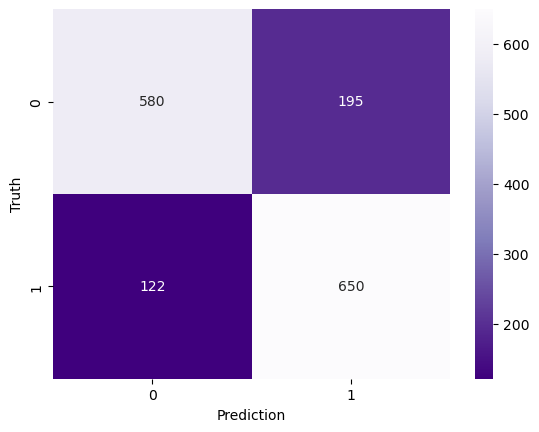

In [24]:
sns.heatmap(matrix,annot=True,fmt='d',cmap='Purples_r')
plt.xlabel('Prediction')
plt.ylabel('Truth')

We need to minimise True negatives.

## (2) Using Pipeline with TF-idf

In [25]:
df.head()

,clean_text,is_depression,preprocessed_text,text_vector
6471,fabianv what kind of doc and what are you usin...,0,fabianv kind doc write doc,"[1.503166, -0.685304, 0.14212, -3.16054, -1.93..."
2198,i ve been really struggling with suicidal thou...,1,ve struggle suicidal thought past week current...,"[1.6281495, 1.8052666, -3.2089107, -1.140905, ..."
3198,le supporter de seahawks regardant le supporte...,1,le supporter de seahawks regardant le supporte...,"[-0.5187884, -1.2927675, 0.017471842, 2.272951..."
348,i know problem have always existed many people...,1,know problem exist people depressed depress sh...,"[0.80994016, 1.5645307, -3.11163, -1.2990757, ..."
948,i hate the constant stress i hate the nonstop ...,1,hate constant stress hate nonstop work hate is...,"[0.49633628, 1.2240479, -2.7359345, -0.7543606..."


In [26]:
X_train,X_test,y_train,y_test = train_test_split(df['preprocessed_text'],
                                                df['is_depression'],
                                                test_size=0.2,
                                                random_state=0)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((6184,), (1547,), (6184,), (1547,))

In [28]:
clf = Pipeline([
    ('tfidf',TfidfVectorizer(ngram_range=(2,3))),
    ('nb',MultinomialNB())
])

clf.fit(X_train,y= y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(2, 3))),
                ('nb', MultinomialNB())])

In [29]:
y_pred = clf.predict(X_test)

matrix_mb = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       775
           1       0.76      0.93      0.84       772

    accuracy                           0.82      1547
   macro avg       0.84      0.82      0.82      1547
weighted avg       0.84      0.82      0.82      1547



Text(50.722222222222214, 0.5, 'Truth')

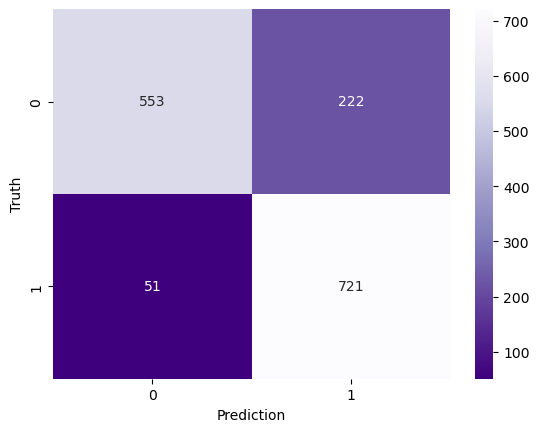

In [30]:
sns.heatmap(matrix_mb,annot=True,fmt='d',cmap="Purples_r")
plt.xlabel('Prediction')
plt.ylabel('Truth')

We managed to decrease the number of True Negatives, but we still have very high number of False Positives

## (3) Using KNN

In [31]:
from  sklearn.neighbors import KNeighborsClassifier

clf = Pipeline([
    ('tfidf',TfidfVectorizer(ngram_range=(1,3))),
    ('knn',KNeighborsClassifier(n_neighbors=70,metric='euclidean'))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix_knn = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       775
           1       0.77      0.96      0.86       772

    accuracy                           0.84      1547
   macro avg       0.86      0.84      0.84      1547
weighted avg       0.86      0.84      0.84      1547



C:\Users\tanze\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(50.722222222222214, 0.5, 'Truth')

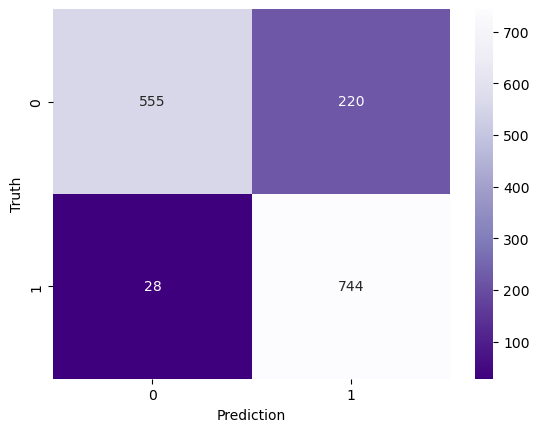

In [32]:
sns.heatmap(matrix_knn,annot=True,fmt='d',cmap="Purples_r")
plt.xlabel('Prediction')
plt.ylabel('Truth')

## (4) Using SVM

In [44]:
from sklearn import svm

clf = Pipeline([
    ('tfidf',TfidfVectorizer(ngram_range=(1,3))),
    ('svn',svm.SVC(kernel='sigmoid'))
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

matrix_svm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       775
           1       0.89      0.97      0.93       772

    accuracy                           0.93      1547
   macro avg       0.93      0.93      0.93      1547
weighted avg       0.93      0.93      0.93      1547



Text(50.722222222222214, 0.5, 'Truth')

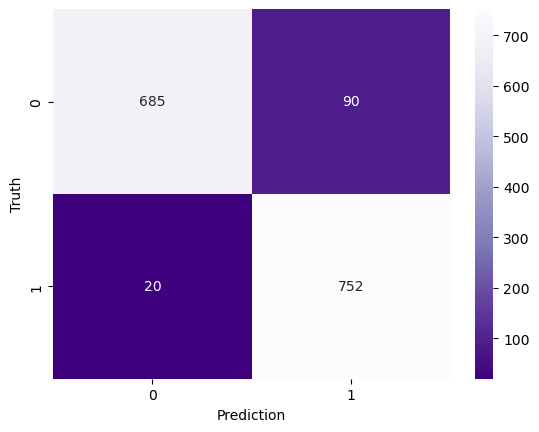

In [45]:
sns.heatmap(matrix_svm,annot=True,fmt='d',cmap="Purples_r")
plt.xlabel('Prediction')
plt.ylabel('Truth')